# Naive Bayes Classification

This script preprocesses text data, trains Naive Bayes classifiers for language, narrative, and subnarrative classification, makes predictions on test data, and saves the predicted labels to a CSV file.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load training data
train_df = pd.read_csv("../balanced_training_data.csv")

# Load testing data
test_df = pd.read_csv("../target.csv")

# Preprocess training data
train_texts = train_df['cleaned'].tolist()
train_titles = train_df['filename'].tolist()
train_labels_narrative = train_df['narrative'].apply(lambda x: x.split(';')).tolist()
train_labels_subnarrative = train_df['sub_narrative'].apply(lambda x: x.split(';')).tolist()
train_languages = train_df['language'].tolist()

# Preprocess testing data
test_texts = test_df['cleaned'].tolist()
test_titles = test_df['filename'].tolist()
test_labels_narrative = test_df['narrative'].apply(lambda x: x.split(';')).tolist()
test_labels_subnarrative = test_df['sub_narrative'].apply(lambda x: x.split(';')).tolist()
test_languages = test_df['language'].tolist()

# Vectorize texts
vectorizer = CountVectorizer(max_df=0.75, min_df=1, ngram_range=(1,2))
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Binarize labels
mlb_narrative = MultiLabelBinarizer()
y_train_narrative = mlb_narrative.fit_transform(train_labels_narrative)
y_test_narrative = mlb_narrative.transform(test_labels_narrative)

mlb_subnarrative = MultiLabelBinarizer()
y_train_subnarrative = mlb_subnarrative.fit_transform(train_labels_subnarrative)
y_test_subnarrative = mlb_subnarrative.transform(test_labels_subnarrative)

# Encode languages
le = LabelEncoder()
y_train_lang = le.fit_transform(train_languages)
y_test_lang = le.transform(test_languages)

# Train Naive Bayes classifier for language
nb_lang = MultinomialNB(alpha=1.25, fit_prior=True)
nb_lang.fit(X_train, y_train_lang)

# Train Naive Bayes classifier for narrative labels
nb_narrative = OneVsRestClassifier(MultinomialNB(alpha=1, fit_prior=True))
nb_narrative.fit(X_train, y_train_narrative)

# Train Naive Bayes classifier for subnarrative labels
nb_subnarrative = OneVsRestClassifier(MultinomialNB(alpha=1.25, fit_prior=True))
nb_subnarrative.fit(X_train, y_train_subnarrative)

# Predict on testing data
pred_lang = nb_lang.predict(X_test)
pred_narrative = nb_narrative.predict(X_test)
pred_subnarrative = nb_subnarrative.predict(X_test)

# Convert predictions back to label format
pred_labels_lang = le.inverse_transform(pred_lang)
pred_labels_narrative = mlb_narrative.inverse_transform(pred_narrative)
pred_labels_subnarrative = mlb_subnarrative.inverse_transform(pred_subnarrative)

# Create a DataFrame with filenames and predicted labels
output_df = pd.DataFrame({
    'Filename': test_titles,
    'Predicted Language': pred_labels_lang,
    'Predicted Narrative': [';'.join(labels) for labels in pred_labels_narrative],
    'Predicted Subnarrative': [';'.join(labels) for labels in pred_labels_subnarrative]
})

# Save the DataFrame to a CSV file
output_df.to_csv('predicted_labels.csv', index=False)

print("Predicted labels saved to 'predicted_labels.csv'")

c:\Users\elfir\anaconda3\envs\nlp\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['CC: Green policies are geopolitical instruments: Other'] will be ignored
  warnings.warn(


Predicted labels saved to 'predicted_labels.csv'


This code evaluates the performance of Naive Bayes classifiers for language, narrative, and subnarrative classification tasks by generating detailed classification reports and calculating key metrics (accuracy, precision, recall, F1). It then visualizes these metrics using bar plots for comparison.

Language Classification Report:
              precision    recall  f1-score   support

          EN       1.00      1.00      1.00        41
          PT       1.00      1.00      1.00        35

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76

Narrative Classification Report:
                                                        precision    recall  f1-score   support

                          CC: Amplifying Climate Fears       0.92      1.00      0.96        23
                      CC: Climate change is beneficial       0.00      0.00      0.00         1
              CC: Controversy about green technologies       0.17      0.50      0.25         2
                     CC: Criticism of climate movement       0.60      0.75      0.67         8
                     CC: Criticism of climate policies       0.29      0.17      0.21        12
         CC: Criticism of insti

c:\Users\elfir\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\elfir\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\elfir\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\elfir

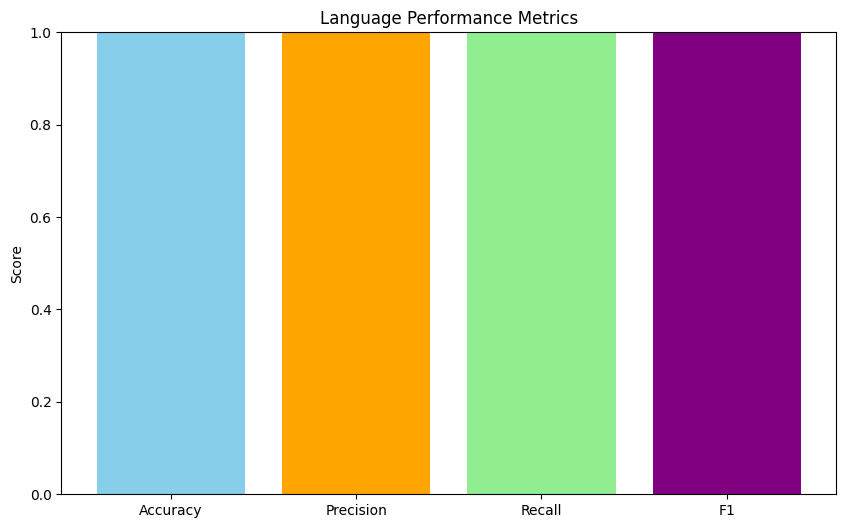

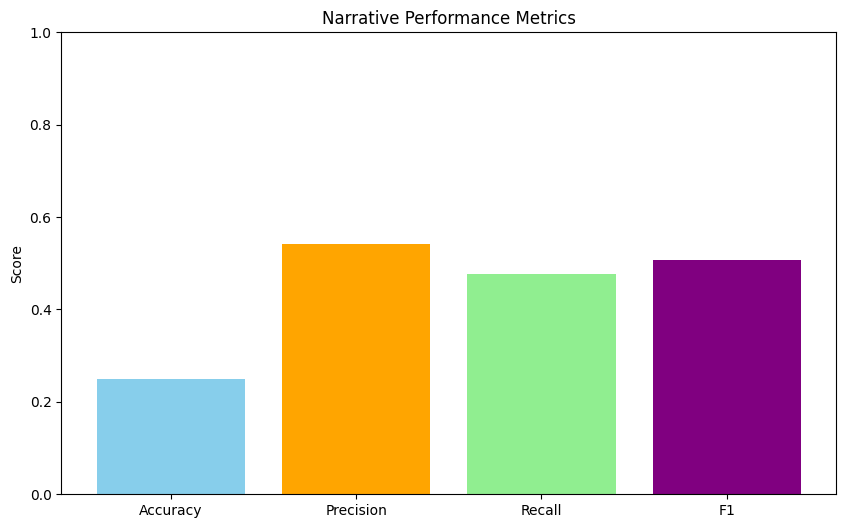

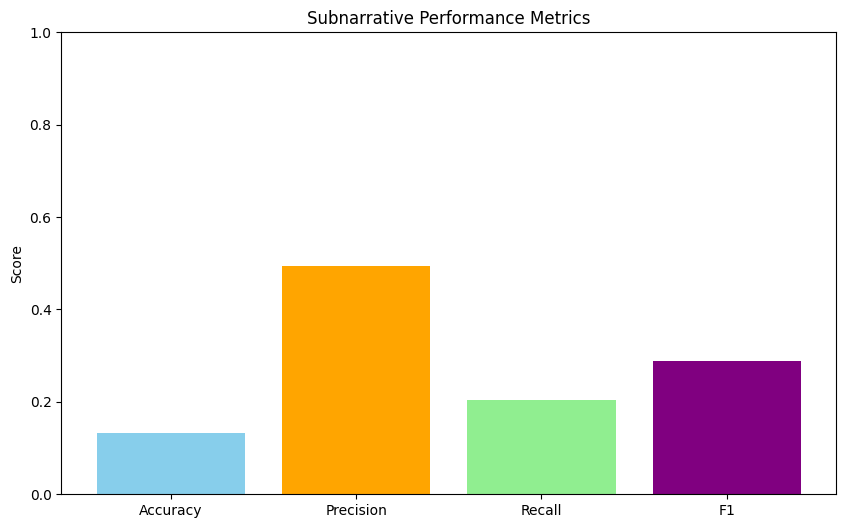

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model
print("Language Classification Report:")
print(classification_report(y_test_lang, pred_lang, target_names=le.classes_))

print("Narrative Classification Report:")
print(classification_report(y_test_narrative, pred_narrative, target_names=mlb_narrative.classes_))

print("Subnarrative Classification Report:")
print(classification_report(y_test_subnarrative, pred_subnarrative, target_names=mlb_subnarrative.classes_))

def calculate_metrics(y_true, y_pred, average_method="micro"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average_method, zero_division=0)
    recall = recall_score(y_true, y_pred, average=average_method, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=average_method, zero_division=0)
    return accuracy, precision, recall, f1

def plot_metrics_comparison(language_metrics, narrative_metrics, subnarrative_metrics):
    categories = ['Accuracy', 'Precision', 'Recall', 'F1']
    x = range(len(categories))

    data = {
        'Language': language_metrics,
        'Narrative': narrative_metrics,
        'Subnarrative': subnarrative_metrics
    }

    for key, metrics in data.items():
        plt.figure(figsize=(10, 6))
        plt.bar(x, metrics, color=['skyblue', 'orange', 'lightgreen', 'purple'])
        plt.xticks(x, categories)
        plt.ylim(0, 1)
        plt.title(f'{key} Performance Metrics')
        plt.ylabel('Score')
        plt.show()

# Calculate metrics for each task
lang_metrics = calculate_metrics(y_test_lang, pred_lang, average_method="macro")
narrative_metrics = calculate_metrics(y_test_narrative, pred_narrative, average_method="micro")
subnarrative_metrics = calculate_metrics(y_test_subnarrative, pred_subnarrative, average_method="micro")

# Print metrics
print(f"Language Metrics (Accuracy, Precision, Recall, F1): {lang_metrics}")
print(f"Narrative Metrics (Accuracy, Precision, Recall, F1): {narrative_metrics}")
print(f"Subnarrative Metrics (Accuracy, Precision, Recall, F1): {subnarrative_metrics}")

# Plot metrics comparison
plot_metrics_comparison(lang_metrics, narrative_metrics, subnarrative_metrics)



This script loads and preprocesses both oversampled and non-oversampled datasets, trains and evaluates Naive Bayes classifiers with various hyperparameters, and compares the results to determine the best hyperparameters for each task.

In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Function to load and preprocess data
def load_and_preprocess_data(train_file, test_file):
    # Load training data
    train_df = pd.read_csv(train_file)

    # Load testing data
    test_df = pd.read_csv(test_file)

    # Preprocess training data
    train_texts = train_df['cleaned'].tolist()
    train_titles = train_df['filename'].tolist()
    train_labels_narrative = train_df['narrative'].apply(lambda x: x.split(';')).tolist()
    train_labels_subnarrative = train_df['sub_narrative'].apply(lambda x: x.split(';')).tolist()
    train_languages = train_df['language'].tolist()

    # Preprocess testing data
    test_texts = test_df['cleaned'].tolist()
    test_titles = test_df['filename'].tolist()
    test_labels_narrative = test_df['narrative'].apply(lambda x: x.split(';')).tolist()
    test_labels_subnarrative = test_df['sub_narrative'].apply(lambda x: x.split(';')).tolist()
    test_languages = test_df['language'].tolist()

    return train_texts, train_labels_narrative, train_labels_subnarrative, train_languages, test_texts, test_labels_narrative, test_labels_subnarrative, test_languages

# Define n-gram ranges to test
ngram_ranges = [(1, 1), (1, 2)]

# Define alpha values to test
alpha_values = [0.1, 0.5, 0.75, 1.0, 1.25, 1.5, 2.0]

# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['Source', 'Task', 'Alpha', 'Ngram', 'Accuracy', 'Precision', 'Recall', 'F1', 'F1 Macro', 'F1 Micro', 'F1 Std Dev'])

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, average_method="micro"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average_method, zero_division=0)
    recall = recall_score(y_true, y_pred, average=average_method, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=average_method, zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
    f1_micro = f1_score(y_true, y_pred, average='micro', zero_division=0)
    f1_per_class = f1_score(y_true, y_pred, average=None, zero_division=0)
    f1_std_dev = np.std(f1_per_class)
    return accuracy, precision, recall, f1, f1_macro, f1_micro, f1_std_dev

# Function to train and evaluate models
def train_and_evaluate(train_texts, train_labels_narrative, train_labels_subnarrative, train_languages, test_texts, test_labels_narrative, test_labels_subnarrative, test_languages, source):
    global results
    for ngram_range in ngram_ranges:
        # Vectorize texts
        vectorizer = CountVectorizer(max_df=0.75, min_df=1, ngram_range=ngram_range)
        X_train = vectorizer.fit_transform(train_texts)
        X_test = vectorizer.transform(test_texts)
        
        # Binarize labels
        mlb_narrative = MultiLabelBinarizer()
        y_train_narrative = mlb_narrative.fit_transform(train_labels_narrative)
        y_test_narrative = mlb_narrative.transform(test_labels_narrative)
        
        mlb_subnarrative = MultiLabelBinarizer()
        y_train_subnarrative = mlb_subnarrative.fit_transform(train_labels_subnarrative)
        y_test_subnarrative = mlb_subnarrative.transform(test_labels_subnarrative)
        
        # Encode languages
        le = LabelEncoder()
        y_train_lang = le.fit_transform(train_languages)
        y_test_lang = le.transform([lang if lang in le.classes_ else 'unknown' for lang in test_languages])
        
        for alpha in alpha_values:
            # Train Naive Bayes classifier for language
            nb_lang = MultinomialNB(alpha=alpha, fit_prior=True)
            nb_lang.fit(X_train, y_train_lang)
            pred_lang = nb_lang.predict(X_test)
            lang_metrics = calculate_metrics(y_test_lang, pred_lang, average_method="macro")
            lang_metrics_df = pd.DataFrame([{'Source': source, 'Task': 'Language', 'Alpha': alpha, 'Ngram': ngram_range, 'Accuracy': lang_metrics[0], 'Precision': lang_metrics[1], 'Recall': lang_metrics[2], 'F1': lang_metrics[3], 'F1 Macro': lang_metrics[4], 'F1 Micro': lang_metrics[5], 'F1 Std Dev': lang_metrics[6]}])
            if not lang_metrics_df.isna().all().all():
                results = pd.concat([results, lang_metrics_df], ignore_index=True)
            
            # Train Naive Bayes classifier for narrative labels
            nb_narrative = OneVsRestClassifier(MultinomialNB(alpha=alpha, fit_prior=True))
            nb_narrative.fit(X_train, y_train_narrative)
            pred_narrative = nb_narrative.predict(X_test)
            narrative_metrics = calculate_metrics(y_test_narrative, pred_narrative, average_method="micro")
            narrative_metrics_df = pd.DataFrame([{'Source': source, 'Task': 'Narrative', 'Alpha': alpha, 'Ngram': ngram_range, 'Accuracy': narrative_metrics[0], 'Precision': narrative_metrics[1], 'Recall': narrative_metrics[2], 'F1': narrative_metrics[3], 'F1 Macro': narrative_metrics[4], 'F1 Micro': narrative_metrics[5], 'F1 Std Dev': narrative_metrics[6]}])
            if not narrative_metrics_df.isna().all().all():
                results = pd.concat([results, narrative_metrics_df], ignore_index=True)
            
            # Train Naive Bayes classifier for subnarrative labels
            nb_subnarrative = OneVsRestClassifier(MultinomialNB(alpha=alpha, fit_prior=True))
            nb_subnarrative.fit(X_train, y_train_subnarrative)
            pred_subnarrative = nb_subnarrative.predict(X_test)
            subnarrative_metrics = calculate_metrics(y_test_subnarrative, pred_subnarrative, average_method="micro")
            subnarrative_metrics_df = pd.DataFrame([{'Source': source, 'Task': 'Subnarrative', 'Alpha': alpha, 'Ngram': ngram_range, 'Accuracy': subnarrative_metrics[0], 'Precision': subnarrative_metrics[1], 'Recall': subnarrative_metrics[2], 'F1': subnarrative_metrics[3], 'F1 Macro': subnarrative_metrics[4], 'F1 Micro': subnarrative_metrics[5], 'F1 Std Dev': subnarrative_metrics[6]}])
            if not subnarrative_metrics_df.isna().all().all():
                results = pd.concat([results, subnarrative_metrics_df], ignore_index=True)

# Load and preprocess data from both sources
train_texts_1, train_labels_narrative_1, train_labels_subnarrative_1, train_languages_1, test_texts, test_labels_narrative, test_labels_subnarrative, test_languages = load_and_preprocess_data("../balanced_training_data.csv", "../target.csv")
train_texts_2, train_labels_narrative_2, train_labels_subnarrative_2, train_languages_2, _, _, _, _ = load_and_preprocess_data("../training_data.csv", "../target.csv")

# Train and evaluate models for both sources
train_and_evaluate(train_texts_1, train_labels_narrative_1, train_labels_subnarrative_1, train_languages_1, test_texts, test_labels_narrative, test_labels_subnarrative, test_languages, "Balanced Training Data")
train_and_evaluate(train_texts_2, train_labels_narrative_2, train_labels_subnarrative_2, train_languages_2, test_texts, test_labels_narrative, test_labels_subnarrative, test_languages, "Training Data")

# Print the results
print(results)

# Output the best hyperparameter results
best_results = results.loc[results.groupby(['Source', 'Task'])['F1'].idxmax()]
print("Best Hyperparameter Results:")
print(best_results)

c:\Users\elfir\anaconda3\envs\nlp\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['CC: Green policies are geopolitical instruments: Other'] will be ignored
  warnings.warn(
C:\Users\elfir\AppData\Local\Temp\ipykernel_33812\4043934112.py:86: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, lang_metrics_df], ignore_index=True)
c:\Users\elfir\anaconda3\envs\nlp\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['CC: Green policies are geopolitical instruments: Other'] will be ignored
  warnings.warn(
c:\Users\elfir\anaconda3\envs\nlp\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['CC: Green policies are 

                    Source          Task  Alpha   Ngram  Accuracy  Precision  \
0   Balanced Training Data      Language    0.1  (1, 1)  1.000000   1.000000   
1   Balanced Training Data     Narrative    0.1  (1, 1)  0.263158   0.446429   
2   Balanced Training Data  Subnarrative    0.1  (1, 1)  0.065789   0.291845   
3   Balanced Training Data      Language    0.5  (1, 1)  1.000000   1.000000   
4   Balanced Training Data     Narrative    0.5  (1, 1)  0.197368   0.378378   
..                     ...           ...    ...     ...       ...        ...   
79           Training Data     Narrative    1.5  (1, 2)  0.328947   0.661972   
80           Training Data  Subnarrative    1.5  (1, 2)  0.236842   0.593220   
81           Training Data      Language    2.0  (1, 2)  1.000000   1.000000   
82           Training Data     Narrative    2.0  (1, 2)  0.328947   0.721311   
83           Training Data  Subnarrative    2.0  (1, 2)  0.223684   0.666667   

      Recall        F1  F1 Macro  F1 Mi